## Predicting rainfall with Linear Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.DataFrame()
for i in range(2000,2020):
    i = pd.read_html(f'{i}.html')[0]
    data = data.append(i)

In [5]:
cols = ['Month','Mean Pressure (hPa)','Air Temp Absolute Daily Max (C)','Mean Daily Max','Air Temp Mean (C)','Mean Daily Min',
        'Air Temp Absolute Daily Min (C)','Mean Dew Point (C)','Mean Relative Humidity (%)',
        'Mean Amount of Cloud (%)','Total Rainfall (mm)',
        'Total Bright Sunshine (hours)','Prevailing Wind Direction (degrees)','Mean Wind Speed (km/h)']

In [6]:
data.columns = cols

In [7]:
data.head()

,Month,Mean Pressure (hPa),Air Temp Absolute Daily Max (C),Mean Daily Max,Air Temp Mean (C),Mean Daily Min,Air Temp Absolute Daily Min (C),Mean Dew Point (C),Mean Relative Humidity (%),Mean Amount of Cloud (%),Total Rainfall (mm),Total Bright Sunshine (hours),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h)
0,1,1019.5,24.0,19.1,17.0,15.3,7.2,12.2,74,64,70.3,130.7,050,26.5
1,2,1017.8,23.2,17.4,15.4,13.6,8.5,11.8,80,70,27.6,99.7,060,24.9
2,3,1015.3,27.7,21.5,19.2,17.2,11.0,15.2,79,67,40.9,137.1,040,22.4
3,4,1011.1,30.2,25.1,23.1,21.4,19.0,20.4,85,85,547.7,77.3,070,22.0
4,5,1008.6,32.4,28.4,26.1,24.5,20.6,22.3,80,75,208.3,148.5,080#,21.6#


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Month                                240 non-null    int64  
 1   Mean Pressure (hPa)                  240 non-null    float64
 2   Air Temp Absolute Daily Max (C)      240 non-null    float64
 3   Mean Daily Max                       240 non-null    float64
 4   Air Temp Mean (C)                    240 non-null    float64
 5   Mean Daily Min                       240 non-null    float64
 6   Air Temp Absolute Daily Min (C)      240 non-null    float64
 7   Mean Dew Point (C)                   240 non-null    float64
 8   Mean Relative Humidity (%)           240 non-null    int64  
 9   Mean Amount of Cloud (%)             240 non-null    int64  
 10  Total Rainfall (mm)                  240 non-null    object 
 11  Total Bright Sunshine (hours)    

## Data Cleaning

In [9]:
def trace(value):
    if value == 'Trace':
        return 0.05
    elif value == '微量':
        return 0.05
    else:
        return value

In [10]:
def clean(value):
    if '#' in value:
        return value[:-1]
    else:
        return value

In [11]:
data = data.drop('Month',axis=1)

In [12]:
data['Prevailing Wind Direction (degrees)'] = data['Prevailing Wind Direction (degrees)'].astype(str)
data['Mean Wind Speed (km/h)'] = data['Mean Wind Speed (km/h)'].astype(str)

In [13]:
data['Total Rainfall (mm)'] = data['Total Rainfall (mm)'].apply(trace)
data['Prevailing Wind Direction (degrees)'] = data['Prevailing Wind Direction (degrees)'].apply(clean)
data['Mean Wind Speed (km/h)'] = data['Mean Wind Speed (km/h)'].apply(clean)

In [14]:
data['Total Rainfall (mm)'] = data['Total Rainfall (mm)'].astype(float)
data['Prevailing Wind Direction (degrees)'] = data['Prevailing Wind Direction (degrees)'].astype(int)
data['Mean Wind Speed (km/h)'] = data['Mean Wind Speed (km/h)'].astype(float)

In [134]:
data.head()

,Mean Pressure (hPa),Air Temp Absolute Daily Max (C),Mean Daily Max,Air Temp Mean (C),Mean Daily Min,Air Temp Absolute Daily Min (C),Mean Dew Point (C),Mean Relative Humidity (%),Mean Amount of Cloud (%),Total Rainfall (mm),Total Bright Sunshine (hours),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h)
0,1019.5,24.0,19.1,17.0,15.3,7.2,12.2,74,64,70.3,130.7,50,26.5
1,1017.8,23.2,17.4,15.4,13.6,8.5,11.8,80,70,27.6,99.7,60,24.9
2,1015.3,27.7,21.5,19.2,17.2,11.0,15.2,79,67,40.9,137.1,40,22.4
3,1011.1,30.2,25.1,23.1,21.4,19.0,20.4,85,85,547.7,77.3,70,22.0
4,1008.6,32.4,28.4,26.1,24.5,20.6,22.3,80,75,208.3,148.5,80,21.6


### Cross Validation with train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop('Total Rainfall (mm)',axis=1)
y = data['Total Rainfall (mm)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Import LinearRegression and creat an instance of a model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

### Fit model

In [20]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coefficients of each column

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ -21.58649332    9.07016706 -113.08848821  282.60929672 -201.64398994
   15.73205181   16.78314611    6.55509386   -5.08928271   -1.41440594
    0.43702532    9.20780921]


### Generate predictions

In [22]:
predictions = lm.predict( X_test)

### Plot predictions against y true values

Text(0, 0.5, 'Predicted Y')

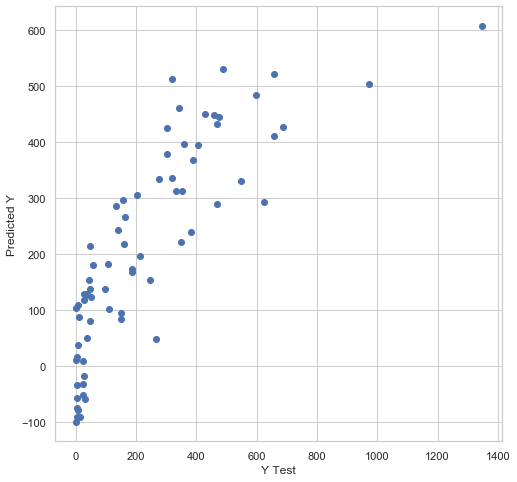

In [26]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model Evaluation

In [27]:
from sklearn import metrics
import numpy as np
import seaborn as sns

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 100.42548657159298
MSE: 22005.000227233926
RMSE: 148.34082454683175


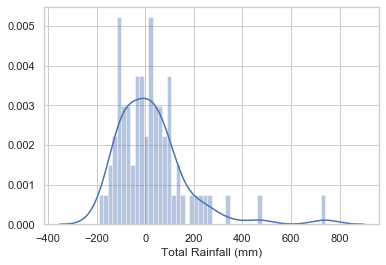

In [28]:
sns.distplot((y_test-predictions),bins=50);

In [153]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Mean Pressure (hPa),-21.586493
Air Temp Absolute Daily Max (C),9.070167
Mean Daily Max,-113.088488
Air Temp Mean (C),282.609297
Mean Daily Min,-201.643990
Air Temp Absolute Daily Min (C),15.732052
Mean Dew Point (C),16.783146
Mean Relative Humidity (%),6.555094
Mean Amount of Cloud (%),-5.089283
Total Bright Sunshine (hours),-1.414406
